<a href="https://colab.research.google.com/github/jg116907/NLPstudy/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA(탐색적 데이터 분석)
- 데이터에 대해 최대한 많은 정보를 뽑아내는 것이 목적
- 정보는 평균값, 중앙값, 최솟값, 최댓값, 범위, 분포, 이상치 등이 있다.
- 해당 정보들을 시각화하여 데이터에 대한 직관을 얻어야 함.

In [0]:
import os
import re
import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

# 실습에 사용될 영화 리뷰 데이터 다운로드
data_set = tf.keras.utils.get_file(
  fname="imdb.tar.gz",
  origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
  extract=True
)

84131840/84125825 [==============================] - 8s 0us/step


In [0]:
# text 파일들을 합쳐서 Dataframe으로 변환하는 함수
def directory_data(directory):
  data = {}
  data["review"] = []
  for file_path in os.listdir(directory):
    with open(os.path.join(directory,file_path),"r") as file:
      data["review"].append(file.read())
  return pd.DataFrame.from_dict(data)

In [0]:
# 긍정,부정 데이터를 나눠서 Dataframe 연동
def data(directory):
  pos_df = directory_data(os.path.join(directory,"pos"))
  neg_df = directory_data(os.path.join(directory,"neg"))
  pos_df["sentiment"] = 1
  neg_df["sentiment"] = 0
  
  return pd.concat([pos_df,neg_df])

In [0]:
train_df = data(os.path.join(os.path.dirname(data_set),"aclImdb","train"))
test_df = data(os.path.join(os.path.dirname(data_set),"aclImdb","test"))

In [0]:
train_df.head()

,review,sentiment
0,Soapdish may go down as one of the single most...,1
1,I thought the movie was actually pretty good. ...,1
2,"Sherman, set the wayback machine for... 1986. ...",1
3,"When I first saw this movie, I thought it was ...",1
4,"""Pandora's Clock"" is a gripping suspense/thril...",1


In [0]:
reviews = list(train_df["review"]) # 각 문장을 리스트로 저장

In [0]:
# 문자열 문장 리스트를 토크나이징
tokenized_reviews = [r.split() for r in reviews]
# 토크나이징된 리스트에 대한 각 길이를 저장 (word 단위)
review_len_by_token = [len(t) for t in tokenized_reviews]
# 토크나이징된 것을 붙여서 음절의 길이를 저장 (alphabet 단위)
review_len_by_eumjeol = [len(s.replace(' ','')) for s in reviews]

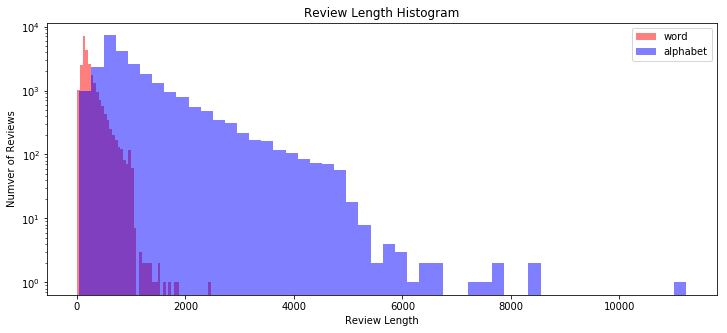

In [0]:
import matplotlib.pyplot as plt

# 그래프에 대한 이미지 크기 선언
plt.figure(figsize=(12,5))
# histogram 선언
plt.hist(review_len_by_token,bins=50,alpha=0.5,color='r',label='word') # 단어 개수
plt.hist(review_len_by_eumjeol,bins=50,alpha=0.5,color='b',label='alphabet') # 알파벳 개수
plt.yscale('log',nonposy='clip')
# 그래프 제목, x축, y축 label
plt.title('Review Length Histogram')
plt.xlabel('Review Length')
plt.ylabel('Numver of Reviews')
plt.legend()

plt.show()

In [0]:
# 데이터 분포의 통계적 수치화
import numpy as np

print("문장 최대 길이 : ",np.max(review_len_by_token))
print("문장 최소 길이 : ",np.min(review_len_by_token))
print("문장 평균 길이 : ",np.mean(review_len_by_token))
print("문장 길이 표준편차 : ",np.std(review_len_by_token))
print("문장 중간 길이 : ",np.median(review_len_by_token))
# 사분위에 대한 경우는 0~100으로 스케일 되어있다.
print("제 1사분위 길이 : ",np.percentile(review_len_by_token,25))
print("제 3사분위 길이 : ",np.percentile(review_len_by_token,75))

문장 최대 길이 :  2470
문장 최소 길이 :  10
문장 평균 길이 :  233.7872
문장 길이 표준편차 :  173.72955740506563
문장 중간 길이 :  174.0
제 1사분위 길이 :  127.0
제 3사분위 길이 :  284.0


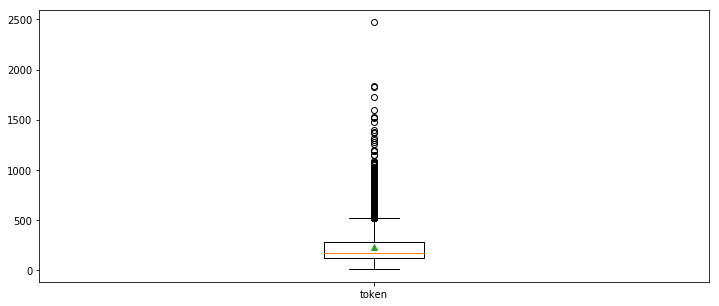

In [0]:
# 단어 개수를 box plot으로 데이터 시각화
plt.figure(figsize=(12,5))
# box plot 생성
plt.boxplot([review_len_by_token], labels=['token'], showmeans=True)
plt.show()

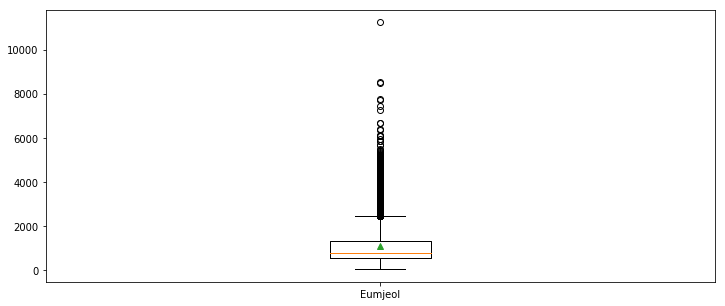

In [0]:
# 알파벳 개수를 box plot으로 시각화
plt.figure(figsize=(12,5))
plt.boxplot([review_len_by_eumjeol], labels=['Eumjeol'], showmeans=True)
plt.show()

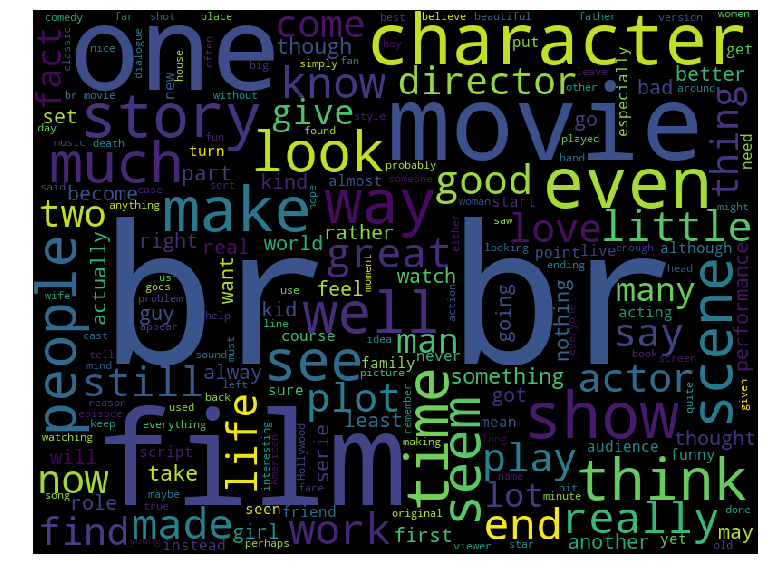

In [0]:
# Word Cloud 데이터 시각화
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black',width=800,height=600,).generate(' '.join(train_df['review']))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show() # html tag의 br 외 기타 tag 때문에 제대로 된 cloud가 만들어지지 않음 -> 전처리 필요

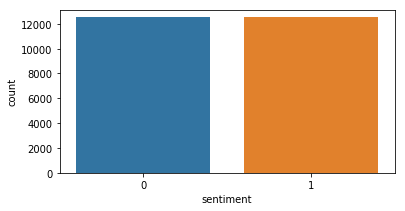

In [21]:
# 긍정 부정의 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df['sentiment'].value_counts()
fig,axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_df['sentiment'])
plt.show() # 긍정과 부정의 개수가 12000개로 데이터의 균형이 아주 좋음